# &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Customer Transaction Prediction

## 1. Problem Statement
**Business Objective:** The primary business objective of this project is to analyze and understand the key factors that are use to identify the customer who will make `transaction` in the future based on the data. By applying Exploratory Data Analysis and Machine Learning techniques, the project aims to uncover, how different features of customer and their financial background gives information about the customer who will make transaction in future. This understanding enables bank to make data-driven decisions about **transaction** of a customer.

**Machine Leaning Type:** *Supervised Machine Learning: Classification Technique*

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
#Phi_K: powerful library for correlation analysis
#Works with categorical, ordinal, and interval (continuous) variables.
#Captures non-linear dependencies.
import phik
from phik import report

# To see all columns/rows of DataFrame, if we refresh kernel, it will reset
pd.set_option('display.max_columns', None,'display.max_rows', None)

## 2. Loading Dataset

In [2]:
# Loading the Customer Transaction Prediction Dataset
customer_df=pd.read_csv(r'C:\Datamites_DataScience_Course\Datamites Internship\Customer Transaction Prediction\PRCP-1003-CustTransPred\train.csv')
print('Number of rows:',customer_df.shape[0])
print('Number of columns:',customer_df.shape[1])
print('='*50)
customer_df.head()

Number of rows: 200000
Number of columns: 202


ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7   var_8   var_9  var_10   var_11   var_12   var_13  var_14  \
0  18.6266 -4.9200  5.7470  2.9252   3.1821  14.0137   0.5745  8.7989   
1  16.5338  3.1468  8.0851 -0.4032   8.0585  14.0239   8.4135  5.4345   
2  14.6155 -4.9193  5.9525 -0.3249 -11.2648  14.1929   7.3124  7.5244   
3  14.9250 -5.8609  8.2450  2.3061   2.8102  13.8463  11.9704  6.4569   
4  19.2514  6.2654  7.6784 -9.4458 -12.1419  13.8481   7.8895  7.7894   

    var_15   var_16   var_17   var_18   var_19   var_20   var_21   var_22  \
0  14.5691   5.7487  -7.2393   4.2840  30.7133  10.5350  16.2191   2.5791   
1  13.7003  13.8275 -15.5849   7.8000  28.5708   3.4287   2.7407   8.5524   
2  14.6472   7.6782  -1.7395   4.7011  20.4775  17.7559  18.1377   1.2145   
3  14.8372  10.7430  -0.4299  15.9426  13.7257  20.3010  12.5579   6.8202   
4  15.0553   8.4871  -3.0680   6.5263  11.3152  21.4246  18.9608  10.1102   

   var_23   var_24   var_25   var_26  var_27  var_28  var_29   var_30  \
0  2.4716  14.3831  13.4325  -5.1488 -0.4073  4.9306  5.9965  -0.3085   
1  3.3716   6.9779  13.8910 -11.7684 -2.5586  5.0464  0.5481  -9.2987   
2  3.5137   5.6777  13.2177  -7.9940 -2.9029  5.8463  6.1439 -11.1025   
3  2.7229  12.1354  13.7367   0.8135 -0.9059  5.9070  2.8407 -15.2398   
4  2.7142  14.2080  13.5433   3.1736 -3.3423  5.9015  7.9352  -3.1582   

    var_31  var_32   var_33   var_34   var_35  var_36  var_37   var_38  \
0  12.9041 -3.8766  16.8911  11.1920  10.5785  0.6764  7.8871   4.6667   
1   7.8755  1.2859  19.3710  11.3702   0.7399  2.7995  5.8434  10.8160   
2  12.4858 -2.2871  19.0422  11.0449   4.1087  4.6974  6.9346  10.8917   
3  10.4407 -2.5731   6.1796  10.6093  -5.9158  8.1723  2.8521   9.1738   
4   9.4668 -0.0083  19.3239  12.4057   0.6329  2.7922  5.8184  19.3038   

   var_39   var_40   var_41   var_42   var_43   var_44   var_45   var_46  \
0  3.8743  -5.2387   7.3746  11.5767  12.0446  11.6418  -7.0170   5.9226   
1  3.6783 -11.1147   1.8730   9.8775  11.7842   1.2444 -47.3797   7.3718   
2  0.9003 -13.5174   2.2439  11.5283  12.0406   4.1006  -7.9078  11.1405   
3  0.6665  -3.8294  -1.0370  11.7770  11.2834   8.0485 -24.6840  12.7404   
4  1.4450  -5.5963  14.0685  11.9171  11.5111   6.9087 -65.4863  13.8657   

    var_47   var_48   var_49   var_50   var_51  var_52  var_53  var_54  \
0 -14.2136  16.0283   5.3253  12.9194  29.0460 -0.6940  5.1736 -0.7474   
1   0.1948  34.4014  25.7037  11.8343  13.2256 -4.1083  6.6885 -8.0946   
2  -5.7864  20.7477   6.8874  12.9143  19.5856  0.7268  6.4059  9.3124   
3 -35.1659   0.7613   8.3838  12.6832   9.5503  1.7895  5.2091  8.0913   
4   0.0444  -0.1346  14.4268  13.3273  10.4857 -1.4367  5.7555 -8.5414   

    var_55   var_56  var_57  var_58   var_59   var_60   var_61  var_62  \
0  14.8322  11.2668  5.3822  2.0183  10.1166  16.1828   4.9590  2.0771   
1  18.5995  19.3219  7.0118  1.9210   8.8682   8.0109  -7.2417  1.7944   
2   6.2846  15.6372  5.8200  1.1000   9.1854  12.5963 -10.3734  0.8748   
3  12.3972  14.4698  6.5850  3.3164   9.4638  15.7820 -25.0222  3.4418   
4  14.1482  16.9840  6.1812  1.9548   9.2048   8.6591 -27.7439 -0.4952   

   var_63  var_64  var_65  var_66   var_67  var_68  var_69   var_70  var_71  \
0 -0.2154  8.6748  9.5319  5.8056  22.4321  5.0109 -4.7010  21.6374  0.5663   
1 -1.3147  8.1042  1.5365  5.4007   7.9344  5.0220  2.2302  40.5632  0.5134   
2  5.8042  3.7163 -1.1016  7.3667   9.8565  5.0228 -5.7828   2.3612  0.8520   
3 -4.3923  8.6464  6.3072  5.6221  23.6143  5.0220 -3.9989   4.0462

## 3. Basic Checks

In [3]:
# checking the shape of dataset
customer_df.shape

(200000, 202)

In [4]:
# checking the datatypes used
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [5]:
# Checking the Statstical data of numerical columns
customer_df.describe(exclude='object').T

count       mean        std      min        25%       50%  \
target   200000.0   0.100490   0.300653   0.0000   0.000000   0.00000   
var_0    200000.0  10.679914   3.040051   0.4084   8.453850  10.52475   
var_1    200000.0  -1.627622   4.050044 -15.0434  -4.740025  -1.60805   
var_2    200000.0  10.715192   2.640894   2.1171   8.722475  10.58000   
var_3    200000.0   6.796529   2.043319  -0.0402   5.254075   6.82500   
var_4    200000.0  11.078333   1.623150   5.0748   9.883175  11.10825   
var_5    200000.0  -5.065317   7.863267 -32.5626 -11.200350  -4.83315   
var_6    200000.0   5.408949   0.866607   2.3473   4.767700   5.38510   
var_7    200000.0  16.545850   3.418076   5.3497  13.943800  16.45680   
var_8    200000.0   0.284162   3.332634 -10.5055  -2.317800   0.39370   
var_9    200000.0   7.567236   1.235070   3.9705   6.618800   7.62960   
var_10   200000.0   0.394340   5.500793 -20.7313  -3.594950   0.48730   
var_11   200000.0  -3.245596   5.970253 -26.0950  -7.510600  -3.28695   
var_12   200000.0  14.023978   0.190059  13.4346  13.894000  14.02550   
var_13   200000.0   8.530232   4.639536  -6.0111   5.072800   8.60425   
var_14   200000.0   7.537606   2.247908   1.0133   5.781875   7.52030   
var_15   200000.0  14.573126   0.411711  13.0769  14.262800  14.57410   
var_16   200000.0   9.333264   2.557421   0.6351   7.452275   9.23205   
var_17   200000.0  -5.696731   6.712612 -33.3802 -10.476225  -5.66635   
var_18   200000.0  15.244013   7.851370 -10.6642   9.177950  15.19625   
var_19   200000.0  12.438567   7.996694 -12.4025   6.276475  12.45390   
var_20   200000.0  13.290894   5.876254  -5.4322   8.627800  13.19680   
var_21   200000.0  17.257883   8.196564 -10.0890  11.551000  17.23425   
var_22   200000.0   4.305430   2.847958  -5.3225   2.182400   4.27515   
var_23   200000.0   3.019540   0.526893   1.2098   2.634100   3.00865   
var_24   200000.0  10.584400   3.777245  -0.6784   7.613000  10.38035   
var_25   200000.0  13.667496   0.285535  12.7200  13.456400  13.66250   
var_26   200000.0  -4.055133   5.922210 -24.2431  -8.321725  -4.19690   
var_27   200000.0  -1.137908   1.523714  -6.1668  -2.307900  -1.13210   
var_28   200000.0   5.532980   0.783367   2.0896   4.992100   5.53485   
var_29   200000.0   5.053874   2.615942  -4.7872   3.171700   4.95020   
var_30   200000.0  -7.687740   7.965198 -34.7984 -13.766175  -7.41175   
var_31   200000.0  10.393046   2.159891   2.1406   8.870000  10.36565   
var_32   200000.0  -0.512886   2.587830  -8.9861  -2.500875  -0.49765   
var_33   200000.0  14.774147   4.322325   1.5085  11.456300  14.57600   
var_34   200000.0  11.434250   0.541614   9.8169  11.032300  11.43520   
var_35   200000.0   3.842499   5.179559 -16.5136   0.116975   3.91775   
var_36   200000.0   2.187230   3.119978  -8.0951  -0.007125   2.19800   
var_37   200000.0   5.868899   2.249730  -1.1834   4.125475   5.90065   
var_38   200000.0  10.642131   4.278903  -6.3371   7.591050  10.56270   
var_39   200000.0   0.662956   4.068845 -14.5457  -2.199500   0.67230   
var_40   200000.0  -6.725505   8.279259 -35.2117 -12.831825  -6.61745   
var_41   200000.0   9.299858   5.938088  -8.5359   4.519575   9.16265   
var_42   200000.0  11.222356   0.695991   8.8590  10.713200  11.24340   
var_43   200000.0  11.569954   0.309599  10.6528  11.343800  11.56500   
var_44   200000.0   8.948289   5.903073  -9.9396   5.313650   9.43720   
var_45   200000.0 -12.699667  21.404912 -90.2525 -28.730700 -12.54720   
var_46   200000.0  11.326488   2.860511   1.2062   9.248750  11.31075   
var_47   200000.0 -12.471737  10.579862 -47.6862 -20.654525 -12.48240   
var_48   200000.0  14.704713  11.384332 -23.9022   6.351975  14.55920   
var_49   200000.0  16.682499   7.855762  -8.0707  10.653475  16.67240   
var_50   200000.0  12.740986   0.691709  10.3855  12.269000  12.74560   
var_51   200000.0  13.428912   8.187306 -15.0462   7.267625  13.44440   
var_52   200000.0  -2.528816   4.985532 -24.7214  -6.065025  -2.50245 

In [7]:
# Checking the Statstical data of categorical columns
customer_df.describe(include='object').T

count  unique      top freq
ID_code  200000  200000  train_0    1

In [8]:
# Checking the Missing values
customer_df.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
var_28     0
var_29     0
var_30     0
var_31     0
var_32     0
var_33     0
var_34     0
var_35     0
var_36     0
var_37     0
var_38     0
var_39     0
var_40     0
var_41     0
var_42     0
var_43     0
var_44     0
var_45     0
var_46     0
var_47     0
var_48     0
var_49     0
var_50     0
var_51     0
var_52     0
var_53     0
var_54     0
var_55     0
var_56     0
var_57     0
var_58     0
var_59     0
var_60     0
var_61     0
var_62     0
var_63     0
var_64     0
var_65     0
var_66     0
var_67     0
var_68     0
var_69     0
var_70     0
var_71     0
var_72     0
var_73     0
var_74     0

#### **Key findings:** Basic checks of **customer_df** 
* **train.csv:**
  * No. of rows: `200000`
  * No. of Columns: `201`
* No. of Numerical Features: `200`
* No. of Categorical Features: `1`
* **Dependent Feature:** `target` 
* #### Identification of Datatypes present in Dataset
* As we know, after using `df.info()` there are 2 types of Datatypes: **Numerical** (like:`float64(200)`, `int64(1)`, object(1) and **Categorical** (like:`object(1)`)
* There are **No missing values** in Dataset.
* **Categorical Feature:** There is only one categorical column (`ID_code`), which is `irrelevant to train` the model, so I am dropping that feature.

## 4. Exploratory Data Analysis(EDA)

In [9]:
# checking any 5 row
customer_df.sample(5)

ID_code  target    var_0   var_1    var_2   var_3    var_4  \
6517      train_6517       0  10.5269 -4.9900  12.6633  9.3939  12.6489   
147191  train_147191       0  17.5643  5.9568  10.9322  7.8390  12.2427   
15514    train_15514       0  12.6730 -1.2438   9.2322  4.4748  14.1723   
119077  train_119077       1  18.3273 -6.0113  12.0882  3.9910   7.7800   
48925    train_48925       1  12.9277  0.1143  10.0578  9.3370  11.7384   

          var_5   var_6    var_7   var_8   var_9  var_10   var_11   var_12  \
6517    -5.2077  5.5336  16.0865 -4.4775  7.9670 -0.8089  -7.1925  14.1295   
147191   3.1040  5.3576  15.4279 -4.2982  8.0450  5.3268  -4.0758  14.1087   
15514  -13.1935  6.2718  16.2772  4.9422  9.0593 -5.5480  -4.2934  14.0460   
119077   0.2122  6.6304  13.9368  4.2186  8.1520  1.9598 -13.1743  13.8939   
48925    4.9680  5.3057  10.1958 -3.0251  9.0164  1.6064   0.7593  14.1024   

        var_13   var_14   var_15   var_16   var_17   var_18   var_19   var_20  \
6517    4.2934   7.8357  14.3911   9.9241  -2.7738  13.3845  11.7177  23.8811   
147191  5.1888   8.1213  13.9960  13.6714 -12.6996   7.2418  27.6883  11.3198   
15514   5.3382  11.0990  14.4585  12.0555  -7.7793   4.1139  21.6878   7.1355   
119077  2.7954   5.7504  14.8081   3.1757  -9.6547   4.6913  22.2989   5.3861   
48925  -1.9406   6.2377  15.1517  10.3321 -16.2443  19.0143  19.2431   9.0798   

         var_21  var_22  var_23   var_24   var_25   var_26  var_27  var_28  \
6517    19.1038  5.0705  3.8862   3.9727  13.6092  -2.6829 -2.0863  5.9039   
147191  18.7164  0.1843  2.1774   3.8939  13.3536 -13.9708  0.8317  5.1500   
15514   19.3142  5.4424  3.0828   3.6728  13.2796   6.7282  1.5895  5.7280   
119077  14.4756  6.9372  2.9459   8.4800  13.5443  -2.0076 -2.7625  5.4470   
48925    2.4850  4.0075  3.3432  11.7615  13.7599  10.3080  0.6570  6.2997   

         var_29   var_30   var_31  var_32   var_33   var_34  var_35  var_36  \
6517    10.7361 -11.2987  11.8407 -4.8027  17.3806  10.4689  3.0548  1.3734   
147191   9.5028 -11.9801  12.0724  1.1981  17.8468  11.2429 -2.3556  5.0454   
15514    2.6822   1.2616  13.0403  0.2939   9.7153  11.3553 -0.3833  5.4189   
119077   5.4178   7.6166   8.6358 -4.3106  12.6973  11.5158  9.9287 -1.7179   
48925    6.4181  -8.2509  13.9556  0.7344  10.7355  10.9123  5.0621  2.8011   

        var_37   var_38  var_39   var_40   var_41   var_42   var_43   var_44  \
6517    2.9097  12.9070  4.4767   1.4929   3.2684  11.2424  11.8754   9.2733   
147191  3.9806   9.7952  3.0709 -19.4890   0.9548  11.8340  12.0069   7.2565   
15514   0.6557  10.7117  2.6555  -9.2613  15.0315  11.2426  11.5728   9.7629   
119077  2.7800  10.4373  3.9672   8.6665  -2.4178  10.7678  11.5119  19.2659   
48925   4.3665  11.8904  1.2955  12.8194  -2.3890  11.7710  10.9196   7.1560   

         var_45   var_46   var_47   var_48   var_49   var_50   var_51  \
6517    11.7837  13.7672  -8.9829  12.0346  10.3126  12.9200   0.5004   
147191 -58.3383  12.5603 -20.7902   9.6488  25.0562  12.5770   7.2474   
15514  -42.6996  15.8211   2.6003  19.3895  16.6789  12.5064  13.6291   
119077 -43.2545  12.6561  -0.5742  11.9917  11.9847  13.1916  15.9959   
48925   -1.2846  11.0270 -19.1258  17.8551  24.1859  12.0493  15.9059   

         var_52  var_53   var_54   var_55   var_56  var_57   var_58   var_59  \
6517     5.4234  5.8144   2.7729  12.0471  19.4370  7.2719   4.6665   9.1951   
147191 -11.6739  6.3260  -4.3078  22.6646  19.7481  5.5397  -5.0402   8.2262   
15514    1.9444  5.8083  -8.1676  10.4401  13.2050  5.7577  12.1937   8.1720   
119077  -0.8580  5.5434  11.1001  16.6848  16.3050  5.7543   5.0269  10.4676   
48925    2.9941  7.5244  -3.8398  13.7873   8.5083  5.7459   3.2547  10.4095   

         var_60   var_61  var_62  var_63  var_64  var_65  var_66   var_67  \
6517    10.2462 -23.8264  1.9381 -0.5536  4.3203 -0.8165  5.0724   2.2161   
147191  15.6263  -0.8548 -0.5981  1.1068  7.6441  5.5940  5.3010   4.4317   
15514   13.5749 -10.5338  5.54

In [3]:
# Dropping the irrelevant categorical feature
customer_transaction_df=customer_df.drop(['ID_code'],axis=1)
print('Number of rows:',customer_transaction_df.shape[0])
print('Number of columns:',customer_transaction_df.shape[1])
print('='*50)
customer_transaction_df.head()

Number of rows: 200000
Number of columns: 201


target    var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7  \
0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266   
1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338   
2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155   
3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250   
4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514   

    var_8   var_9  var_10   var_11   var_12   var_13  var_14   var_15  \
0 -4.9200  5.7470  2.9252   3.1821  14.0137   0.5745  8.7989  14.5691   
1  3.1468  8.0851 -0.4032   8.0585  14.0239   8.4135  5.4345  13.7003   
2 -4.9193  5.9525 -0.3249 -11.2648  14.1929   7.3124  7.5244  14.6472   
3 -5.8609  8.2450  2.3061   2.8102  13.8463  11.9704  6.4569  14.8372   
4  6.2654  7.6784 -9.4458 -12.1419  13.8481   7.8895  7.7894  15.0553   

    var_16   var_17   var_18   var_19   var_20   var_21   var_22  var_23  \
0   5.7487  -7.2393   4.2840  30.7133  10.5350  16.2191   2.5791  2.4716   
1  13.8275 -15.5849   7.8000  28.5708   3.4287   2.7407   8.5524  3.3716   
2   7.6782  -1.7395   4.7011  20.4775  17.7559  18.1377   1.2145  3.5137   
3  10.7430  -0.4299  15.9426  13.7257  20.3010  12.5579   6.8202  2.7229   
4   8.4871  -3.0680   6.5263  11.3152  21.4246  18.9608  10.1102  2.7142   

    var_24   var_25   var_26  var_27  var_28  var_29   var_30   var_31  \
0  14.3831  13.4325  -5.1488 -0.4073  4.9306  5.9965  -0.3085  12.9041   
1   6.9779  13.8910 -11.7684 -2.5586  5.0464  0.5481  -9.2987   7.8755   
2   5.6777  13.2177  -7.9940 -2.9029  5.8463  6.1439 -11.1025  12.4858   
3  12.1354  13.7367   0.8135 -0.9059  5.9070  2.8407 -15.2398  10.4407   
4  14.2080  13.5433   3.1736 -3.3423  5.9015  7.9352  -3.1582   9.4668   

   var_32   var_33   var_34   var_35  var_36  var_37   var_38  var_39  \
0 -3.8766  16.8911  11.1920  10.5785  0.6764  7.8871   4.6667  3.8743   
1  1.2859  19.3710  11.3702   0.7399  2.7995  5.8434  10.8160  3.6783   
2 -2.2871  19.0422  11.0449   4.1087  4.6974  6.9346  10.8917  0.9003   
3 -2.5731   6.1796  10.6093  -5.9158  8.1723  2.8521   9.1738  0.6665   
4 -0.0083  19.3239  12.4057   0.6329  2.7922  5.8184  19.3038  1.4450   

    var_40   var_41   var_42   var_43   var_44   var_45   var_46   var_47  \
0  -5.2387   7.3746  11.5767  12.0446  11.6418  -7.0170   5.9226 -14.2136   
1 -11.1147   1.8730   9.8775  11.7842   1.2444 -47.3797   7.3718   0.1948   
2 -13.5174   2.2439  11.5283  12.0406   4.1006  -7.9078  11.1405  -5.7864   
3  -3.8294  -1.0370  11.7770  11.2834   8.0485 -24.6840  12.7404 -35.1659   
4  -5.5963  14.0685  11.9171  11.5111   6.9087 -65.4863  13.8657   0.0444   

    var_48   var_49   var_50   var_51  var_52  var_53  var_54   var_55  \
0  16.0283   5.3253  12.9194  29.0460 -0.6940  5.1736 -0.7474  14.8322   
1  34.4014  25.7037  11.8343  13.2256 -4.1083  6.6885 -8.0946  18.5995   
2  20.7477   6.8874  12.9143  19.5856  0.7268  6.4059  9.3124   6.2846   
3   0.7613   8.3838  12.6832   9.5503  1.7895  5.2091  8.0913  12.3972   
4  -0.1346  14.4268  13.3273  10.4857 -1.4367  5.7555 -8.5414  14.1482   

    var_56  var_57  var_58   var_59   var_60   var_61  var_62  var_63  var_64  \
0  11.2668  5.3822  2.0183  10.1166  16.1828   4.9590  2.0771 -0.2154  8.6748   
1  19.3219  7.0118  1.9210   8.8682   8.0109  -7.2417  1.7944 -1.3147  8.1042   
2  15.6372  5.8200  1.1000   9.1854  12.5963 -10.3734  0.8748  5.8042  3.7163   
3  14.4698  6.5850  3.3164   9.4638  15.7820 -25.0222  3.4418 -4.3923  8.6464   
4  16.9840  6.1812  1.9548   9.2048   8.6591 -27.7439 -0.4952 -1.7839  5.2670   

   var_65  var_66   var_67  var_68  var_69   var_70  var_71  var_72   var_73  \
0  9.5319  5.8056  22.4321  5.0109 -4.7010  21.6374  0.5663  5.1999   8.8600   
1  1.5365  5.4007   7.9344  5.0220  2.2302  40.5632  0.5134  3.1701  20.1068   
2 -1.1016  7.3667   9.8565  5.0228 -5.7828   2.3612  0.8520  6.3577  12.1719   
3  6.3072  5.6221  23

### Seperating the Categorical and Numerical features

In [7]:
# Numerical Features
cust_trans_num_features=[feature for feature in customer_transaction_df.columns if customer_transaction_df[feature].dtypes!='object']
# Categorical Features
cust_trans_cat_features=[feature for feature in customer_transaction_df.columns if customer_transaction_df[feature].dtypes=='object']

print('Numerical Features:', cust_trans_num_features,'\n')
print('Length of Numerical Features:',len(cust_trans_num_features))
print('='*40)
print('Categorical Features:', cust_trans_cat_features,'\n')
print('Length of Categorical Features:',len(cust_trans_cat_features))

Numerical Features: ['target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25', 'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49', 'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55', 'var_56', 'var_57', 'var_58', 'var_59', 'var_60', 'var_61', 'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67', 'var_68', 'var_69', 'var_70', 'var_71', 'var_72', 'var_73', 'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79', 'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85', 'var_86', 'var_87', 'var_88', 'var_89', 'var_90', 'var_91', 'var_92', 'var_93', 'var_94', 'var_95', 'var_96', 'var_97',

* There is **No categorical feature** in dataset.

### Numerical Features Analysis

In [16]:
print('Number of Numerical features: ',len(cust_trans_num_features))

Number of Numerical features:  201


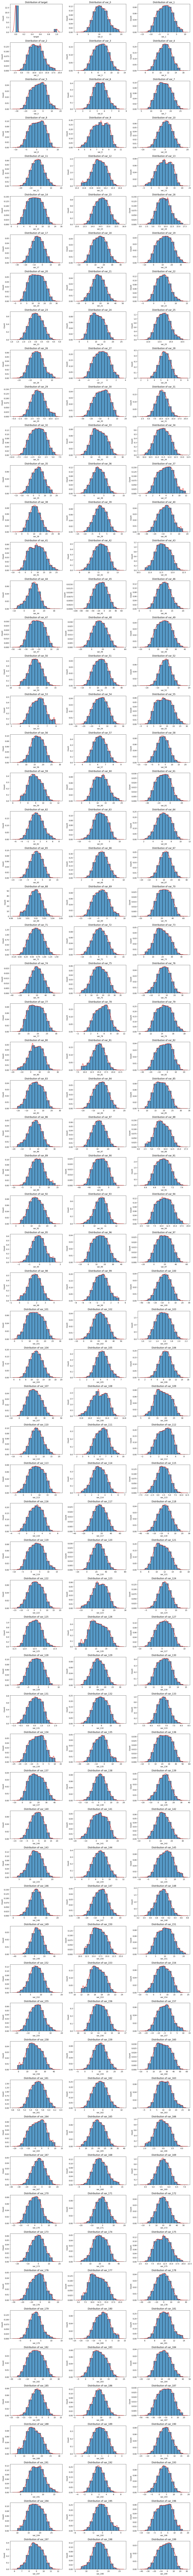

In [21]:
# Plotting histogram with KDE of numerical features
plt.figure(figsize=(15,200))
plotnumber=1
for feature in cust_trans_num_features:
    plt.subplot(67,3,plotnumber)
    ax=sns.histplot(customer_transaction_df[feature], kde=False,stat='density', bins=15)
    sns.kdeplot(customer_transaction_df[feature], color='red',ax=ax)
    plt.title(f'Distribution of {feature}',fontsize=12)
    plt.xlabel(f'{feature}')
    plt.ylabel('Count')
    plotnumber+=1
plt.tight_layout()
plt.show()    

### Correlation of Numerical features with target

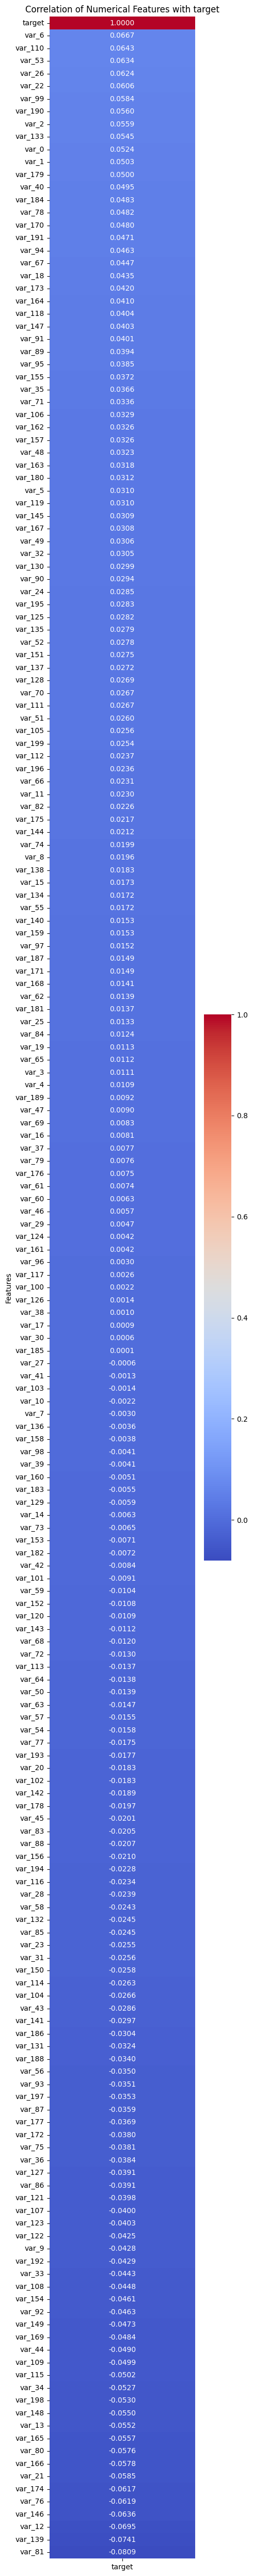

In [28]:
# 1. Finiding the Correlation of Numerical features
corr_matrix = customer_transaction_df[cust_trans_num_features].corr()

# 2. Finding the Correlation with Target feature
target_corr=corr_matrix['target'].sort_values(ascending=False)

# 3. Drawing Heatmap for showing correlation of SalePrice with Numerical Features
plt.figure(figsize=(5,50))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".4f")
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Numerical Features with target')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

### Outlier Detection of Numerical features

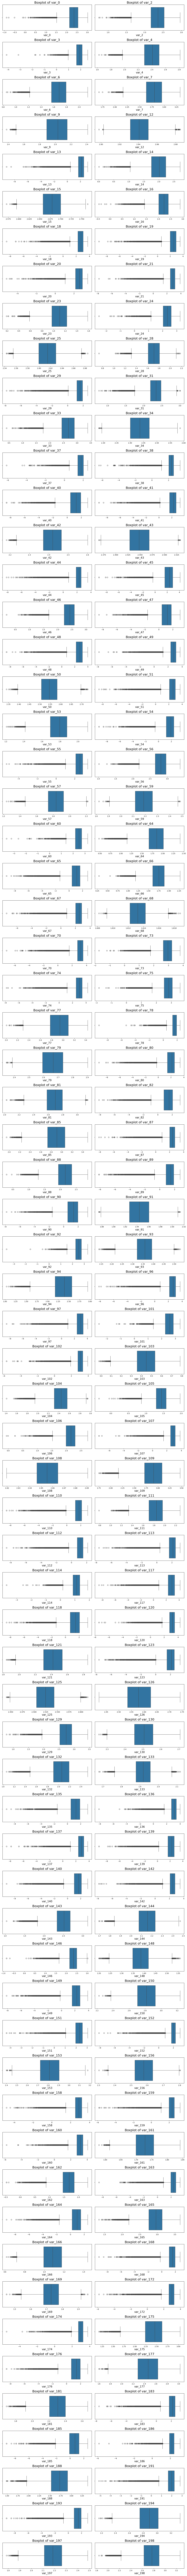

In [10]:
# Outlier Detection
plt.figure(figsize=(15,300))
plotnumber=1
for feature in cust_trans_num_features:
    data= customer_transaction_df.copy()
    if 0 in data[feature].unique():
        # This check is a safety mechanism to prevent your code from crashing with a mathematical error, log0=1.
        pass
    else:
        plt.subplot(101,2,plotnumber)
        data[feature]=np.log(data[feature])
        sns.boxplot(x=data[feature])
        plt.xlabel(feature,fontsize=15)
        plt.title(f'Boxplot of {feature}',fontsize=18)
        plotnumber+=1
plt.tight_layout()
plt.show()    

### Analysis of Target feature

In [22]:
# Checking the categories of Target feature
customer_transaction_df['target'].value_counts()

target
0    179902
1     20098
Name: count, dtype: int64

In [19]:
# Checking the % of each categories of Target feature
customer_transaction_df['target'].value_counts(normalize=True)*100

target
0    89.951
1    10.049
Name: proportion, dtype: float64

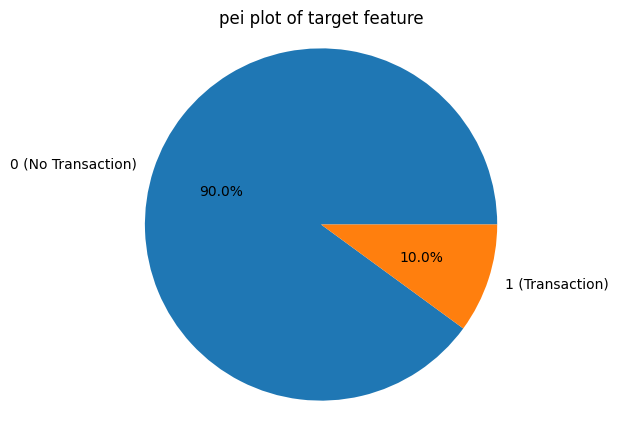

In [20]:
# Plotting the each categories on Pie plot
counts=customer_transaction_df['target'].value_counts()
plt.figure(figsize=(5,5))

# Plot the pie chart
plt.pie(counts,labels=['0 (No Transaction)','1 (Transaction)'],autopct='%1.1f%%')
plt.title('pei plot of target feature')
plt.axis('equal')  # Ensures the pie chart is drawn as a circle
plt.show()

### Key Findings of Exploratory Data Analysis (EDA)

* **Feature Independence:** The 200 features are almost entirely uncorrelated. This is rare for real-world data and suggests they were pre-processed.
* **Distribution:** Most features follow a Gaussian-like (Normal) distribution.
* **target:** It is highly `imbalanced` because **0** is `90%` and **1** is `10%`.
* **Missing Values:** There is **no missing value**,the dataset is clean and no imputation requires.
* **Features:** There is only **Numerical** datatype, `no Categorical data`.
*  **Outliers:** This dataset have **outliers**, we have to remove those outliers in Feature Engineering.

## 5. Feature Engineering

### Outliers detection and removal

In [4]:
# Outlier detection and removal using IQR
for feature in customer_transaction_df.select_dtypes(include='number').columns:
    #Calculating Quartiles
    Q1=customer_transaction_df[feature].quantile(0.25)
    Q3=customer_transaction_df[feature].quantile(0.75)
    #Calculating InterQuartileRange
    IQR=Q3-Q1
    # Defining Upper and Lower boundary 
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    # After outlier removal, assigning DataFrame(df) to a new variable df_filtered
    customer_transaction_df_filtered = customer_transaction_df[(customer_transaction_df[feature]>=lower_bound)&(customer_transaction_df[feature]<=upper_bound)]

print(customer_transaction_df.shape)
print(customer_transaction_df_filtered.shape)

(200000, 201)
(199980, 201)


## 6. Feature Selection

### Filtering the Multicollinearity from dataset

In [5]:
# Calculate correlation matrix and make negative correlation as positive using abs() function 
data = customer_transaction_df_filtered.copy()
corr_matrix = data.corr().abs()

# Select the upper triangle of the correlation matrix (to avoid duplicates)
# k=1 excludes the diagonal (self-correlation)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than a threshold(Eg.0.8)
to_drop = [feature for feature in upper.columns if any(upper[feature] > 0.9)]

# Drop the identified features
customer_transaction_df_dropped = data.drop(columns=to_drop, axis=1)

print('df_filtered shape:',customer_transaction_df_filtered.shape)
print('df_dropped shape:',customer_transaction_df_dropped.shape)

df_filtered shape: (199980, 201)
df_dropped shape: (199980, 201)


In [6]:
print("Features to drop:", len(to_drop))

Features to drop: 0


* There are **no correlated** features.

## 7. Model Building

In [7]:
customer_transaction_df_dropped.shape

(199980, 201)

### Seperating Independent & Dependent features

In [7]:
X=customer_transaction_df_dropped.drop('target',axis=1)
y=customer_transaction_df_dropped['target']
print('X:',X.shape)
print('y:',y.shape)

X: (199980, 200)
y: (199980,)


### Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (159984, 200)
X_test: (39996, 200)
y_train: (159984,)
y_test: (39996,)


### Feature Scaling


In [10]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
x_train_scaled = standard_scaler.fit_transform(X_train)
x_test_scaled = standard_scaler.transform(X_test)

## 8. Model Training and Evaluation

In [11]:
# Importing libraries needed for Model training and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score)
from sklearn.metrics import ConfusionMatrixDisplay

In [12]:
# Calculate the imbalance ratio
# Format: Number of Negative Class / Number of Positive Class
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
ratio = neg_count / pos_count

print(f"Calculated Ratio: {ratio:.2f}")

Calculated Ratio: 8.96


In [13]:
# creating function to evaluate model
def evaluate_model(true,predicted):
    confusion_matx= confusion_matrix(true,predicted)
    accuracy= accuracy_score(true,predicted)
    f1= f1_score(true,predicted, average='weighted')
    precision= precision_score(true,predicted) 
    recall= recall_score(true,predicted)
    rocauc= roc_auc_score(true,predicted)
    classfication_rep= classification_report(true,predicted)
    return confusion_matx, accuracy, f1, precision, recall, rocauc, classfication_rep 
  
  
# Model Training
models={
    'LogisticRegression':LogisticRegression(),
    'RandomForestClassifier':RandomForestClassifier(),
    'NaiveBayes':GaussianNB(),
    'XGBClassifier':XGBClassifier(
                                   n_estimators=1000,
                                   learning_rate=0.02,        # Slow and steady
                                   max_depth=4,               # Shallow trees avoid memorization
                                   min_child_weight=10,       # Requires more evidence for a rule
                                   gamma=0.5,                 # Minimum gain to make a split
                                   subsample=0.8,             # Randomly sample rows
                                   colsample_bytree=0.7,      # Randomly sample features
                                   reg_lambda=10,             # Strong L2 regularization
                                   scale_pos_weight=ratio,    # MUST include this for your imbalance!
                                   random_state=42,
                                   use_label_encoder=False,
                                   eval_metric='auc'
                                ),
	'LightGBM':LGBMClassifier(
                                # --- Control Overfitting ---
                            n_estimators=1000,        # High number, but we stop early (see below)
                            learning_rate=0.02,       # Slower learning rate = better generalization
                            num_leaves=31,            # Keep small (e.g., < 50) to limit complexity
                            max_depth=4,              # Hard limit on tree depth
                            min_child_samples=200,    # High value prevents learning from "noise" (tiny groups)
                            reg_alpha=0.1,            # L1 regularization
                            reg_lambda=0.1,           # L2 regularization
                            colsample_bytree=0.8,     # Use only 80% of features per tree (adds randomness)
                            subsample=0.8,            # Use only 80% of data per tree (adds randomness)
                            
                            # --- Fix Class Imbalance (Recall = 0 problem) ---
                            class_weight={0:1,1:8.96},  # Automatically weights the minority class (Defaults)
                            
                            # --- Speed ---
                            n_jobs=-1,
                            random_state=42
                            )
}

LogisticRegression :
Model performance for Training set
- Confusion Matrix:


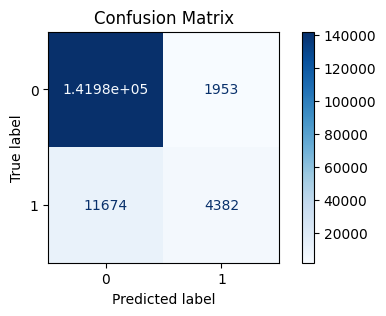

- Accuracy: 0.9148
- F1-Score: 0.8977
- Precision : 0.6917
- Recall : 0.2729
- ROCAUC : 0.6297
- Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    143928
           1       0.69      0.27      0.39     16056

    accuracy                           0.91    159984
   macro avg       0.81      0.63      0.67    159984
weighted avg       0.90      0.91      0.90    159984

------------------------------------------------
Model performance for Test set
- Confusion Matrix:


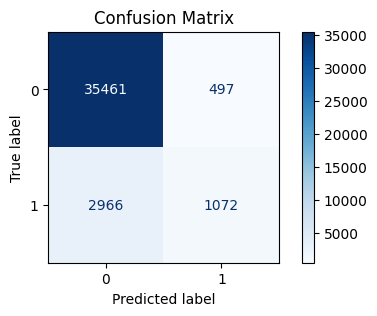

- Accuracy: 0.9134
- F1-Score: 0.8958
- Precision : 0.6832
- Recall : 0.2655
- ROCAUC : 0.6258
- Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35958
           1       0.68      0.27      0.38      4038

    accuracy                           0.91     39996
   macro avg       0.80      0.63      0.67     39996
weighted avg       0.90      0.91      0.90     39996

RandomForestClassifier :
Model performance for Training set
- Confusion Matrix:


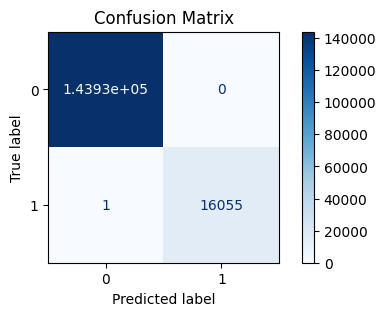

- Accuracy: 1.0000
- F1-Score: 1.0000
- Precision : 1.0000
- Recall : 0.9999
- ROCAUC : 1.0000
- Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    143928
           1       1.00      1.00      1.00     16056

    accuracy                           1.00    159984
   macro avg       1.00      1.00      1.00    159984
weighted avg       1.00      1.00      1.00    159984

------------------------------------------------
Model performance for Test set
- Confusion Matrix:


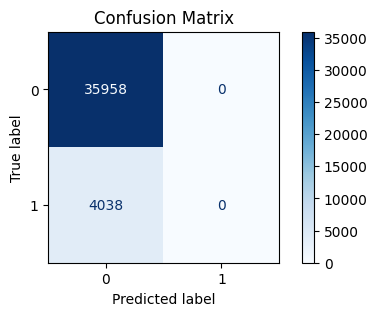

- Accuracy: 0.8990
- F1-Score: 0.8512
- Precision : 0.0000
- Recall : 0.0000
- ROCAUC : 0.5000
- Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35958
           1       0.00      0.00      0.00      4038

    accuracy                           0.90     39996
   macro avg       0.45      0.50      0.47     39996
weighted avg       0.81      0.90      0.85     39996

NaiveBayes :
Model performance for Training set
- Confusion Matrix:


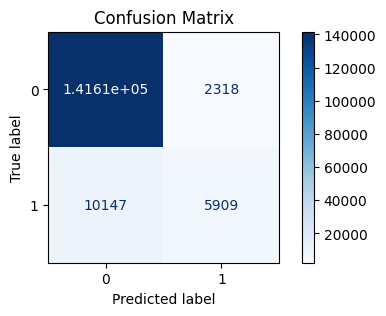

- Accuracy: 0.9221
- F1-Score: 0.9106
- Precision : 0.7182
- Recall : 0.3680
- ROCAUC : 0.6760
- Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96    143928
           1       0.72      0.37      0.49     16056

    accuracy                           0.92    159984
   macro avg       0.83      0.68      0.72    159984
weighted avg       0.91      0.92      0.91    159984

------------------------------------------------
Model performance for Test set
- Confusion Matrix:


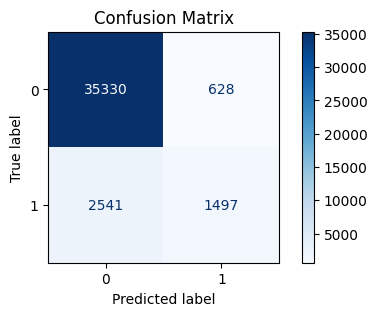

- Accuracy: 0.9208
- F1-Score: 0.9095
- Precision : 0.7045
- Recall : 0.3707
- ROCAUC : 0.6766
- Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     35958
           1       0.70      0.37      0.49      4038

    accuracy                           0.92     39996
   macro avg       0.82      0.68      0.72     39996
weighted avg       0.91      0.92      0.91     39996

XGBClassifier :
Model performance for Training set
- Confusion Matrix:


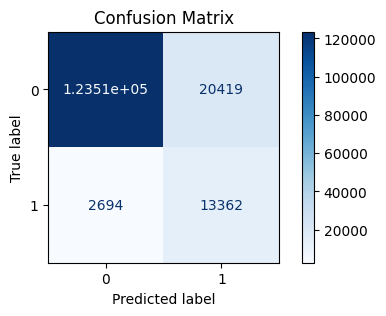

- Accuracy: 0.8555
- F1-Score: 0.8765
- Precision : 0.3955
- Recall : 0.8322
- ROCAUC : 0.8452
- Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.91    143928
           1       0.40      0.83      0.54     16056

    accuracy                           0.86    159984
   macro avg       0.69      0.85      0.73    159984
weighted avg       0.92      0.86      0.88    159984

------------------------------------------------
Model performance for Test set
- Confusion Matrix:


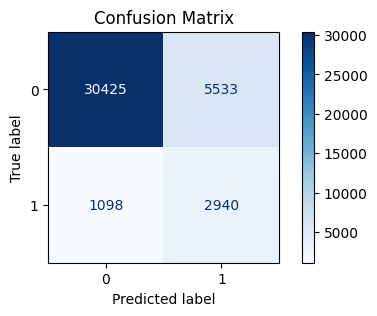

- Accuracy: 0.8342
- F1-Score: 0.8581
- Precision : 0.3470
- Recall : 0.7281
- ROCAUC : 0.7871
- Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.90     35958
           1       0.35      0.73      0.47      4038

    accuracy                           0.83     39996
   macro avg       0.66      0.79      0.69     39996
weighted avg       0.90      0.83      0.86     39996

[LightGBM] [Info] Number of positive: 16056, number of negative: 143928
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.477831 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 159984, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499885 -> initscore=-0.000460
[LightGBM] [Info] Start training from score -0.000460
[LightGBM] [Warning] No further splits with positive ga

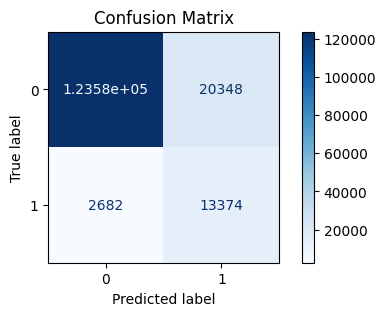

- Accuracy: 0.8560
- F1-Score: 0.8769
- Precision : 0.3966
- Recall : 0.8330
- ROCAUC : 0.8458
- Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.91    143928
           1       0.40      0.83      0.54     16056

    accuracy                           0.86    159984
   macro avg       0.69      0.85      0.73    159984
weighted avg       0.92      0.86      0.88    159984

------------------------------------------------
Model performance for Test set
- Confusion Matrix:


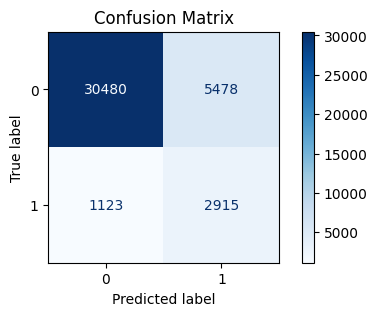

- Accuracy: 0.8350
- F1-Score: 0.8585
- Precision : 0.3473
- Recall : 0.7219
- ROCAUC : 0.7848
- Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90     35958
           1       0.35      0.72      0.47      4038

    accuracy                           0.83     39996
   macro avg       0.66      0.78      0.69     39996
weighted avg       0.90      0.83      0.86     39996



In [14]:
# Models Training and Evaluation

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train_scaled, y_train)
    # Make Predictions
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)
    # Evaluation of Models
    confusion_matx_train, accuracy_train, f1_train, precision_train, recall_train, rocauc_train, classfication_rep_train = evaluate_model(y_train, y_train_pred)
    
    confusion_matx_test, accuracy_test, f1_test, precision_test, recall_test, rocauc_test, classfication_rep_test = evaluate_model(y_test, y_test_pred)
    
    
    print(list(models.keys())[i], ':')
    print('Model performance for Training set')
    print("- Confusion Matrix:") # Removed formatting for array
    #print(confusion_matx_train)  # Print the matrix directly
    fig, ax = plt.subplots(figsize=(6, 3))
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matx_train)
    disp.plot(cmap="Blues", ax=ax, values_format=".5g")
    plt.title("Confusion Matrix")
    plt.show()
    print("- Accuracy: {:.4f}".format(accuracy_train))
    print("- F1-Score: {:.4f}".format(f1_train))
    print("- Precision : {:.4f}".format(precision_train))
    print("- Recall : {:.4f}".format(recall_train))
    print("- ROCAUC : {:.4f}".format(rocauc_train))
    print("- Classification Report:") # Removed formatting for report
    print(classfication_rep_train)  # Print the report directly
    print('------------------------------------------------')
    print('Model performance for Test set')
    print("- Confusion Matrix:") # Removed formatting for array
    #print(confusion_matx_test)  # Print the matrix directly
    fig, ax = plt.subplots(figsize=(6, 3))
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matx_test)
    disp.plot(cmap="Blues", ax=ax, values_format=".5g")
    plt.title("Confusion Matrix")
    plt.show()
    print("- Accuracy: {:.4f}".format(accuracy_test))
    print("- F1-Score: {:.4f}".format(f1_test))
    print("- Precision : {:.4f}".format(precision_test))
    print("- Recall : {:.4f}".format(recall_test))
    print("- ROCAUC : {:.4f}".format(rocauc_test))
    print("- Classification Report:") # Removed formatting for report
    print(classfication_rep_test)  # Print the report directly
    print('='*100)


## 9. Model Comparision and Selection
#### For Training Dataset
| Performance Metrics | Logistic  | Random Forest | XGBClassifier | LightGBM   | NaiveBayes |
| :-------------------| :---------| :-------------|:--------------| :----------| :----------|
| Accuracy            |  0.9148   |  1.0000       | 0.8555        |  0.8560    |  0.9221    |
| F1-Score            |  0.8977   |  1.0000       | 0.8765        |  0.8769    |  0.9106    |
| Precision           |  0.6917   |  1.0000       | 0.3955        |  0.3966    |  0.7182    |
| Recall              |  0.2729   |  0.9999       | 0.8322        |  0.8330    |  0.3680    |
| ROC-AUC Score       |  0.6297   |  1.0000       | 0.8452        |  0.8458    |  0.6760    |

#### For Test Dataset
| Performance Metrics | Logistic  | Random Forest | XGBClassifier | LightGBM   | NaiveBayes|
| :-------------------| :---------| :-------------|:--------------| :----------| :---------|
| Accuracy            |  0.9134   |  0.8990       | 0.8342        |  0.8350    |  0.9208   |
| F1-Score            |  0.8958   |  0.8512       | 0.8581        |  0.8585    |  0.9095   |
| Precision           |  0.6832   |  0.0000       | 0.3470        |  0.3473    |  0.7045   |
| Recall              |  0.2655   |  0.0000       | 0.7281        |  0.7219    |  0.3707   |
| ROC-AUC Score       |  0.6258   |  0.5000       | 0.7871        |  0.7848    |  0.6766   |

* From comparision of different Machine Learning Classification Algorithm for Training and Test dataset, `Logistic Classifier`, `XGBClassifier`, `LightGBM Classifier`,`NaiveBayes` are selected to move forward.
  * **Logistic Classifier:** It is performing `poorly` on Baseline, but it is ironically the `best` of the worst because the drop-off isn't as extreme as the others.
  * **XGBClassifier:**  It has ROC-AUC `~85%` scores on Training but drops to `~79%` AUC on Test, so `overfitting`.
  * **LightGBM Classifier:** It has ROC-AUC `~85%` scores on Training but drops to `~79%` AUC on Test, so `overfitting`.
  * **NaiveBayes:** It has ROC-AUC `~67%` scores on Training and `~67%` AUC on Test, it is better but AUC score should be more than `70%` so I can move further. 
* Now We will perform Hyperparameter Tuning for `XGBClassifier` and `LightGBM Classifier` ML Algorithm to tune their performance.

## 10. Feature Pruning and Hyperparameter Tuning

### 10.A. Feature Pruning

In [15]:
# Fetching the important features
feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': X_train.columns})
print(feature_imp.sort_values(by="Value", ascending=False).iloc[:200])

     Value  Feature
53     219   var_53
174    212  var_174
12     211   var_12
21     206   var_21
34     205   var_34
13     203   var_13
166    202  var_166
1      199    var_1
76     198   var_76
139    197  var_139
133    196  var_133
22     194   var_22
6      192    var_6
165    188  var_165
169    184  var_169
149    178  var_149
115    177  var_115
40     175   var_40
198    175  var_198
78     174   var_78
110    174  var_110
148    174  var_148
99     173   var_99
26     172   var_26
92     172   var_92
146    171  var_146
80     170   var_80
173    167  var_173
184    165  var_184
33     163   var_33
122    159  var_122
154    158  var_154
190    157  var_190
94     156   var_94
9      155    var_9
123    154  var_123
67     153   var_67
81     152   var_81
164    151  var_164
2      148    var_2
118    146  var_118
108    145  var_108
191    145  var_191
109    141  var_109
87     135   var_87
170    134  var_170
89     133   var_89
44     130   var_44
18     130   var_18


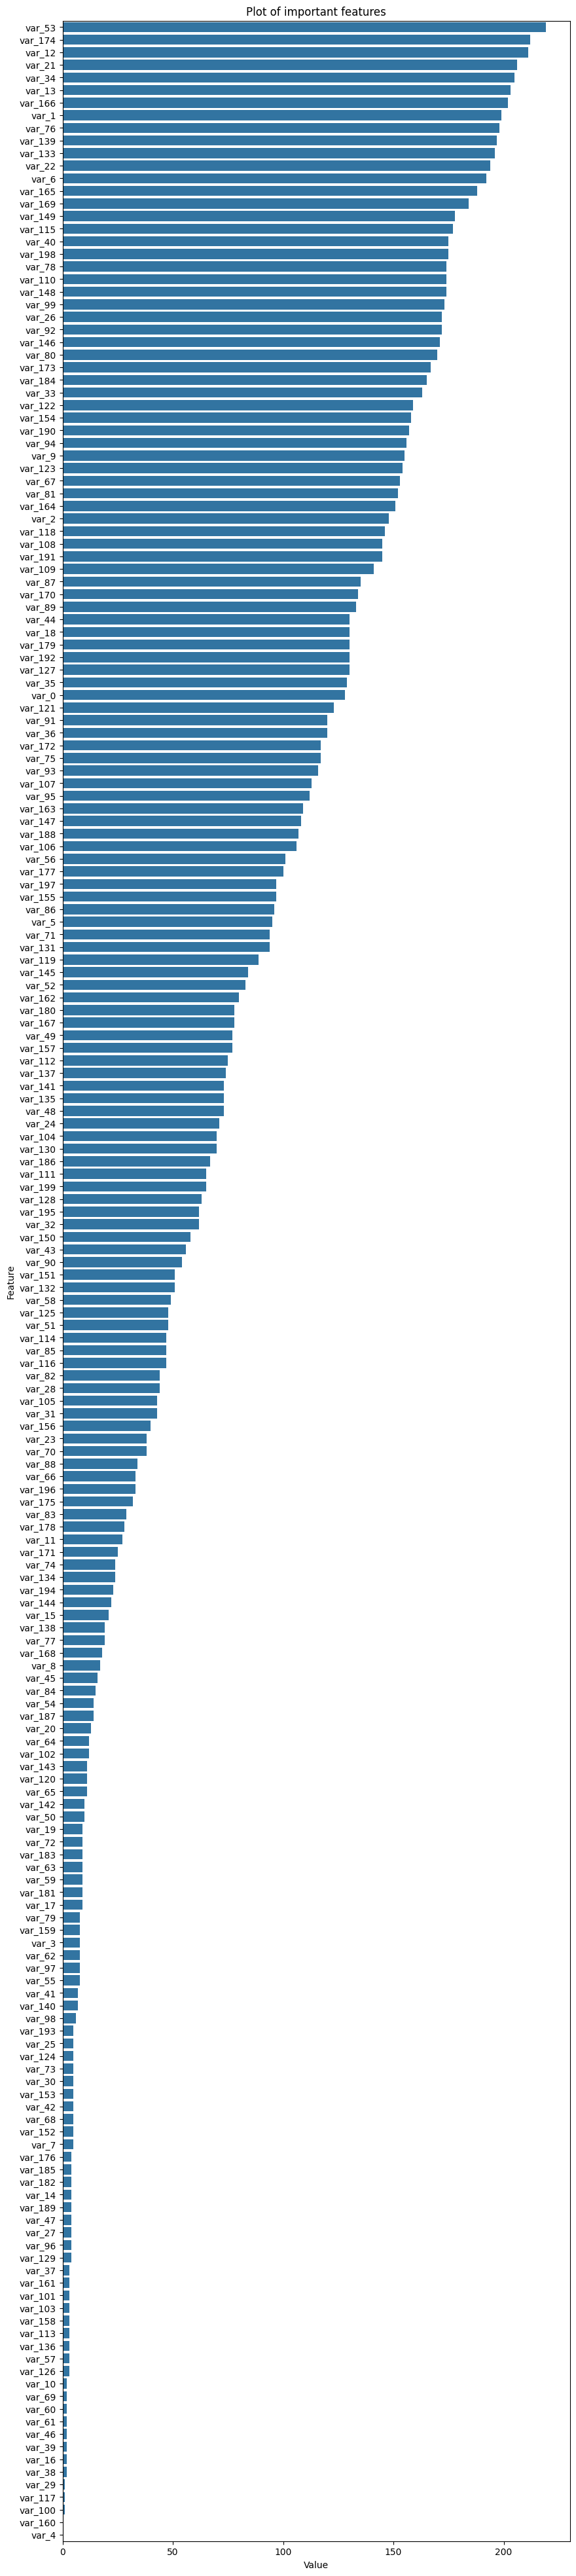

In [16]:
# Plotting the importance features 
plt.figure(figsize=(10, 50))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[:200])
plt.title('Plot of important features')
plt.show()

In [17]:
# Filtering the important features whose values are greater than 0
important_features = feature_imp[feature_imp['Value']>0]['Feature'].tolist()
# Display how many features you are keeping
print(f"Total features originally: {len(X_train.columns)}")
print(f"Features with importance > 0: {len(important_features)}")

Total features originally: 200
Features with importance > 0: 198


In [18]:
# Slice the original DataFrames to keep only those columns
x_train_final = X_train[important_features]
x_test_final = X_test[important_features]

print(f"Dataset cleaned! Reduced from {X_train.shape[1]} to {x_train_final.shape[1]} features.")

Dataset cleaned! Reduced from 200 to 198 features.


In [19]:
# Initialize a new scaler
scaler_final = StandardScaler()

# Fit on training and transform both
x_train_scaled_final = scaler_final.fit_transform(x_train_final)
x_test_scaled_final = scaler_final.transform(x_test_final)

In [20]:
print('x_train_final:',x_train_scaled_final.shape)
print('x_test_final:',x_test_scaled_final.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train_final: (159984, 198)
x_test_final: (39996, 198)
y_train: (159984,)
y_test: (39996,)


### 10.B. Hyperparameter Tuning and Re-Training of ML Model

In [25]:
# Defining Parameters for Hyperparameter Tuning of different ML Classifier Algorithms
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Define the parameter grid
# XGB CLassifier
# We focus on depth, learning rate, and regularization
xgb_params = {
    'n_estimators': [500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 6, 8],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'gamma': [0, 0.1, 0.5, 1],
    'reg_alpha': [0, 0.1, 1, 10],
    'reg_lambda': [1, 5, 10]
}
# LightBGM Classifier
# Ranges are chosen to prevent overfitting
lgbm_params = {
    # Complexity Parameters (Crucial for Overfitting)
    'num_leaves': [20, 31, 50, 70],          # Keep < 50 for strong regularization
    'max_depth': [5, 8, 10, 15],             # Keep low to stop memorization
    'min_child_samples': [20, 50, 100, 200], # Higher = more conservative
    
    # Randomness (Prevent sticking to specific features)
    'subsample': [0.6, 0.8, 1.0],            # % of rows used per tree
    'colsample_bytree': [0.6, 0.8, 1.0],     # % of columns used per tree
    
    # Regularization (L1 and L2)
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0],
    
    # Learning
    'learning_rate': [0.01, 0.05, 0.1]       # Lower is usually better but slower
}

In [26]:
# Models List for Hyperparameter Tuning
random_cv_models=[('XGB',XGBClassifier(
                           use_label_encoder=False, 
                           eval_metric='auc',
                           scale_pos_weight=ratio,
                           tree_method='hist' 
                          ),xgb_params),
                  
                  ('LightGBM',LGBMClassifier(
                            n_estimators=500,           # A decent baseline number of trees
                            #class_weight='balanced',    # REQUIRED for your 0% Recall issue
                            class_weight= {0: 1, 1: 8.96},
                            random_state=42,
                            n_jobs=-1,
                            verbose=-1  
                             ),lgbm_params)]

In [27]:
#Configure Cross-Validation
# Must use StratifiedKFold because of the class imbalance
cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [28]:
# Implementing Hyperparameter Tuning-RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
model_params={}
for name,model,params in random_cv_models:
    random_search_cv = RandomizedSearchCV(
                                          estimator=model,
                                          param_distributions=params, 
                                          n_iter=20,    # Trying 20 combinations    
                                          scoring='roc_auc',         # Optimize for AUC, NOT Accuracy
                                          cv=cv_strategy, 
                                          verbose=1,
                                          random_state=42,
                                          n_jobs=-1
                                        )
    print(f"Starting Hyperparameter Tuning for {name}:")
    random_search_cv.fit(x_train_scaled_final,y_train)
    print(f"\nBest ROC-AUC Score: {random_search_cv.best_score_:.4f}")
    print("Best Parameters:")
    print(random_search_cv.best_params_)
    print('='*50)

Starting Hyperparameter Tuning for XGB:
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best ROC-AUC Score: 0.8889
Best Parameters:
{'subsample': 0.7, 'reg_lambda': 5, 'reg_alpha': 10, 'n_estimators': 1000, 'min_child_weight': 10, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 0.8}
Starting Hyperparameter Tuning for LightGBM:
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best ROC-AUC Score: 0.8875
Best Parameters:
{'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.1, 'num_leaves': 20, 'min_child_samples': 20, 'max_depth': 15, 'learning_rate': 0.05, 'colsample_bytree': 0.6}


#### Retraining the models with Best Parameters

In [29]:
# Retraining the model with best params of each ML Models
ml_models={
    'XGBClassifier':XGBClassifier(
                                   n_estimators=1000,
                                   learning_rate=0.05,        # Slow and steady
                                   max_depth=4,               # Shallow trees avoid memorization
                                   min_child_weight=10,       # Requires more evidence for a rule
                                   gamma=1,                 # Minimum gain to make a split
                                   subsample=0.7,             # Randomly sample rows
                                   colsample_bytree=0.8,      # Randomly sample features
                                   reg_alpha=10,               # L1 regularization
                                   reg_lambda=5,             # Strong L2 regularization
                                   #min_child_samples= 200,
                                   scale_pos_weight=ratio,    # MUST include this for your imbalance!
                                   random_state=42,
                                   use_label_encoder=False,
                                   eval_metric='auc'
                                ),
    'LightGBM':LGBMClassifier(
                                # --- Control Overfitting ---
                            learning_rate=0.05,       # Slower learning rate = better generalization
                            num_leaves=20,            # Keep small (e.g., < 50) to limit complexity
                            max_depth=15,              # Hard limit on tree depth
                            min_child_samples=20,    # High value prevents learning from "noise" (tiny groups)
                            reg_alpha=0.1,            # L1 regularization
                            reg_lambda=0,
                            colsample_bytree=0.6,     # Use only 80% of features per tree (adds randomness)
                            subsample=1.0,            # Use only 80% of data per tree (adds randomness)
                            
                            # --- Fix Class Imbalance (Recall = 0 problem) ---
                            #class_weight='balanced',  # Automatically weights the minority class (Defaults)
                            #class_weight= {0:1,1:5},
                            class_weight={0: 1, 1: 8.96},
                            # --- Speed ---
                             n_jobs=-1,
                             random_state=42
                            )
}

In [30]:
# Models Training and Evaluation
for i in range(len(list(ml_models))):
    model = list(ml_models.values())[i]
    model.fit(x_train_scaled_final, y_train)
    # Make Predictions
    y_train_pred = model.predict(x_train_scaled_final)
    y_test_pred = model.predict(x_test_scaled_final)
    # Evaluation of Models
    confusion_matx_train, accuracy_train, f1_train, precision_train, recall_train, rocauc_train, classfication_rep_train = evaluate_model(y_train, y_train_pred)
    
    confusion_matx_test, accuracy_test, f1_test, precision_test, recall_test, rocauc_test, classfication_rep_test = evaluate_model(y_test, y_test_pred)
    
    
    print(list(ml_models.keys())[i], ':')
    print('Model performance for Training set')
    print("- Confusion Matrix:") # Removed formatting for array
    print(confusion_matx_train)  # Print the matrix directly
    print("- Accuracy: {:.4f}".format(accuracy_train))
    print("- F1-Score: {:.4f}".format(f1_train))
    print("- Precision : {:.4f}".format(precision_train))
    print("- Recall : {:.4f}".format(recall_train))
    print("- ROCAUC : {:.4f}".format(rocauc_train))
    print("- Classification Report:") # Removed formatting for report
    print(classfication_rep_train)  # Print the report directly
    print('------------------------------------------------')
    print('Model performance for Test set')
    print("- Confusion Matrix:") # Removed formatting for array
    print(confusion_matx_test)  # Print the matrix directly
    print("- Accuracy: {:.4f}".format(accuracy_test))
    print("- F1-Score: {:.4f}".format(f1_test))
    print("- Precision : {:.4f}".format(precision_test))
    print("- Recall : {:.4f}".format(recall_test))
    print("- ROCAUC : {:.4f}".format(rocauc_test))
    print("- Classification Report:") # Removed formatting for report
    print(classfication_rep_test)  # Print the report directly
    print('='*100)


XGBClassifier :
Model performance for Training set
- Confusion Matrix:
[[127465  16463]
 [  1857  14199]]
- Accuracy: 0.8855
- F1-Score: 0.9003
- Precision : 0.4631
- Recall : 0.8843
- ROCAUC : 0.8850
- Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.93    143928
           1       0.46      0.88      0.61     16056

    accuracy                           0.89    159984
   macro avg       0.72      0.88      0.77    159984
weighted avg       0.93      0.89      0.90    159984

------------------------------------------------
Model performance for Test set
- Confusion Matrix:
[[31302  4656]
 [ 1080  2958]]
- Accuracy: 0.8566
- F1-Score: 0.8748
- Precision : 0.3885
- Recall : 0.7325
- ROCAUC : 0.8015
- Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     35958
           1       0.39      0.73      0.51      4038

    accuracy                    

#### Retraining the model again with best parameters

In [41]:
# Retraining the model with best params of each ML Models
ml_models={
    'XGBClassifier':XGBClassifier(
                                   n_estimators=5000,
                                   learning_rate=0.01,        # Slow and steady
                                   max_depth=3,               # Shallow trees avoid memorization
                                   min_child_weight=100,       # Requires more evidence for a rule
                                   gamma=5,                 # Minimum gain to make a split
                                   subsample=0.7,             # Randomly sample rows
                                   colsample_bytree=0.2,      # Randomly sample features
                                   reg_alpha=10,               # L1 regularization
                                   reg_lambda=100,             # Strong L2 regularization
                                   #min_child_samples= 200,
                                   scale_pos_weight=ratio,    # MUST include this for your imbalance!
                                   random_state=42,
                                   use_label_encoder=False,
                                   eval_metric='auc'
                                ),
    'LightGBM':LGBMClassifier(
                                 # --- Control Overfitting ---
                            learning_rate=0.05,       # Slower learning rate = better generalization
                            num_leaves=20,            # Keep small (e.g., < 50) to limit complexity
                            max_depth=15,              # Hard limit on tree depth
                            min_child_samples=20,    # High value prevents learning from "noise" (tiny groups)
                            reg_alpha=0.1,            # L1 regularization
                            reg_lambda=0,
                            colsample_bytree=0.6,     # Use only 80% of features per tree (adds randomness)
                            subsample=1.0,            # Use only 80% of data per tree (adds randomness)
                            
                            # --- Fix Class Imbalance (Recall = 0 problem) ---
                            #class_weight='balanced',  # Automatically weights the minority class (Defaults)
                            #class_weight= {0:1,1:5},
                            class_weight={0: 1, 1: 8.96},
                            # --- Speed ---
                             n_jobs=-1,
                             random_state=42
                            )
}

In [42]:
# Models Training and Evaluation
for i in range(len(list(ml_models))):
    model = list(ml_models.values())[i]
    model.fit(x_train_scaled_final, y_train)
    # Make Predictions
    y_train_pred = model.predict(x_train_scaled_final)
    y_test_pred = model.predict(x_test_scaled_final)
    # Evaluation of Models
    confusion_matx_train, accuracy_train, f1_train, precision_train, recall_train, rocauc_train, classfication_rep_train = evaluate_model(y_train, y_train_pred)
    
    confusion_matx_test, accuracy_test, f1_test, precision_test, recall_test, rocauc_test, classfication_rep_test = evaluate_model(y_test, y_test_pred)
    
    
    print(list(ml_models.keys())[i], ':')
    print('Model performance for Training set')
    print("- Confusion Matrix:") # Removed formatting for array
    print(confusion_matx_train)  # Print the matrix directly
    print("- Accuracy: {:.4f}".format(accuracy_train))
    print("- F1-Score: {:.4f}".format(f1_train))
    print("- Precision : {:.4f}".format(precision_train))
    print("- Recall : {:.4f}".format(recall_train))
    print("- ROCAUC : {:.4f}".format(rocauc_train))
    print("- Classification Report:") # Removed formatting for report
    print(classfication_rep_train)  # Print the report directly
    print('------------------------------------------------')
    print('Model performance for Test set')
    print("- Confusion Matrix:") # Removed formatting for array
    print(confusion_matx_test)  # Print the matrix directly
    print("- Accuracy: {:.4f}".format(accuracy_test))
    print("- F1-Score: {:.4f}".format(f1_test))
    print("- Precision : {:.4f}".format(precision_test))
    print("- Recall : {:.4f}".format(recall_test))
    print("- ROCAUC : {:.4f}".format(rocauc_test))
    print("- Classification Report:") # Removed formatting for report
    print(classfication_rep_test)  # Print the report directly
    print('='*100)


XGBClassifier :
Model performance for Training set
- Confusion Matrix:
[[122520  21408]
 [  2641  13415]]
- Accuracy: 0.8497
- F1-Score: 0.8722
- Precision : 0.3852
- Recall : 0.8355
- ROCAUC : 0.8434
- Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91    143928
           1       0.39      0.84      0.53     16056

    accuracy                           0.85    159984
   macro avg       0.68      0.84      0.72    159984
weighted avg       0.92      0.85      0.87    159984

------------------------------------------------
Model performance for Test set
- Confusion Matrix:
[[30354  5604]
 [  947  3091]]
- Accuracy: 0.8362
- F1-Score: 0.8605
- Precision : 0.3555
- Recall : 0.7655
- ROCAUC : 0.8048
- Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     35958
           1       0.36      0.77      0.49      4038

    accuracy                    

## Model Comparision and Selection
#### For Training Dataset
| Performance Metrics | XGBClassifier | LightGBM   |
| :-------------------|:--------------| :----------|
| Accuracy            |  0.8497       |  0.7750    |
| F1-Score            |  0.8722       |  0.8163    |
| Precision           |  0.3852       |  0.2843    |
| Recall              |  0.8355       |  0.8182    |
| ROC-AUC Score       |  0.8434       |  0.7942    |

#### For Test Dataset
| Performance Metrics | XGBClassifier | LightGBM   |
| :-------------------|:--------------| :----------|
| Accuracy            |  0.8362       |  0.7622    |
| F1-Score            |  0.8605       |  0.8056    |
| Precision           |  0.3555       |  0.2630    |
| Recall              |  0.7655       |  0.7524    |
| ROC-AUC Score       |  0.8048       |  0.7578    |


### Finding best Threshold and F-1 Score for both models

In [43]:
ml_models.keys()

dict_keys(['XGBClassifier', 'LightGBM'])

In [44]:
# Find the Probabilities of each model
from sklearn.metrics import f1_score, precision_recall_curve

# Fetching the models
xgb_model= ml_models['XGBClassifier']
lgbm_model= ml_models['LightGBM']

# Find the raw probabilities of each models
# Use x_test_scaled_final as per code
xgb_probs = xgb_model.predict_proba(x_test_scaled_final)[:, 1]
lgbm_probs = lgbm_model.predict_proba(x_test_scaled_final)[:, 1]

In [45]:
# Defining the function find the Threshold value of each model
def get_optimal_threshold(y_true, y_probs, model_name):
    # Calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_true, y_probs)
    
    # Calculate F1 for each threshold
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    
    # Find the best index
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]
    
    print(f"--- {model_name} Optimal Results ---")
    print(f"Best Threshold: {best_threshold:.4f}")
    print(f"Max F1-Score:   {f1_scores[best_idx]:.4f}\n")
    
    return best_threshold

# Execute for both
best_xgb_t = get_optimal_threshold(y_test, xgb_probs, "XGBClassifier")
best_lgbm_t = get_optimal_threshold(y_test, lgbm_probs, "LightGBM")

--- XGBClassifier Optimal Results ---
Best Threshold: 0.6719
Max F1-Score:   0.5528

--- LightGBM Optimal Results ---
Best Threshold: 0.6005
Max F1-Score:   0.4722



In [55]:
# 1. Create predictions based on the optimized threshold
xgb_final_pred = (xgb_probs >= best_xgb_t).astype(int)
lgbm_final_pred = (lgbm_probs >= best_lgbm_t).astype(int)

# 2. Evaluate both models
print("="*20)
print('OPTIMIZED THRESHOLDS')
print("="*20)

print(f"\n[XGBoost Classifier] - Threshold: {best_xgb_t:.4f}")
print(classification_report(y_test, xgb_final_pred))
print('-'*55)
print(f"\n[LightGBM Classifier] - Threshold: {best_lgbm_t:.4f}")
print(classification_report(y_test, lgbm_final_pred))

OPTIMIZED THRESHOLDS

[XGBoost Classifier] - Threshold: 0.6719
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     35958
           1       0.56      0.54      0.55      4038

    accuracy                           0.91     39996
   macro avg       0.76      0.75      0.75     39996
weighted avg       0.91      0.91      0.91     39996

-------------------------------------------------------

[LightGBM Classifier] - Threshold: 0.6005
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     35958
           1       0.44      0.51      0.47      4038

    accuracy                           0.88     39996
   macro avg       0.69      0.72      0.70     39996
weighted avg       0.89      0.88      0.89     39996



#### Interpretation of result for best Threshold
* If your Best Threshold is lower than $0.5$ (e.g., 0.35): The model was being too conservative. Lowering the bar will catch even more defaulters, though you'll annoy a few more good customers.

* If your Best Threshold is higher than $0.5$ (e.g., 0.64): This will `clean up` your Precision. You will stop flagging so many good customers as "Risky," but you might let a few more defaulters through.

In [56]:
# 1. Get the raw probabilities
y_test_probs_lgbm = lgbm_model.predict_proba(x_test_scaled_final)[:, 1]
y_test_probs_xgb = xgb_model.predict_proba(x_test_scaled_final)[:, 1]
# Get probabilities for the training set
y_train_probs_lgbm = lgbm_model.predict_proba(x_train_scaled_final)[:, 1]
y_train_probs_xgb = xgb_model.predict_proba(x_train_scaled_final)[:, 1]

# 2. Apply your optimized threshold
lgbm_best_threshold = 0.6719
xgb_best_threshold= 0.6005

y_pred_optimized_lgbm = (y_test_probs_lgbm >= lgbm_best_threshold).astype(int)
y_pred_optimized_xgb= (y_test_probs_xgb >= xgb_best_threshold).astype(int)

# 3.a. Print the improved results for LightGBM
print("--- Optimized Model Performance for LightGBM---")
print(confusion_matrix(y_test, y_pred_optimized_lgbm))
print(classification_report(y_test, y_pred_optimized_lgbm))
# 4. Calculate the AUC score
test_auc_score_lgbm = roc_auc_score(y_test, y_test_probs_lgbm)
train_auc_score_lgbm = roc_auc_score(y_train, y_train_probs_lgbm)
print(f"Train ROC-AUC Score: {train_auc_score_lgbm:.4f}")
print(f"Test ROC-AUC Score: {test_auc_score_lgbm:.4f}")
print('='*80,'\n')
# 3.b. Print the improved results for XGB
print("--- Optimized Model Performance for XGB---")
print(confusion_matrix(y_test, y_pred_optimized_xgb))
print(classification_report(y_test, y_pred_optimized_xgb))
# 4. Calculate the AUC score
test_auc_score_xgb = roc_auc_score(y_test, y_test_probs_xgb)
train_auc_score_xgb = roc_auc_score(y_train, y_train_probs_xgb)
print(f"Train ROC-AUC Score: {train_auc_score_xgb:.4f}")
print(f"Test ROC-AUC Score: {test_auc_score_xgb:.4f}")

--- Optimized Model Performance for LightGBM---
[[35214   744]
 [ 2886  1152]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     35958
           1       0.61      0.29      0.39      4038

    accuracy                           0.91     39996
   macro avg       0.77      0.63      0.67     39996
weighted avg       0.89      0.91      0.89     39996

Train ROC-AUC Score: 0.8778
Test ROC-AUC Score: 0.8384

--- Optimized Model Performance for XGB---
[[33078  2880]
 [ 1470  2568]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     35958
           1       0.47      0.64      0.54      4038

    accuracy                           0.89     39996
   macro avg       0.71      0.78      0.74     39996
weighted avg       0.91      0.89      0.90     39996

Train ROC-AUC Score: 0.9215
Test ROC-AUC Score: 0.8876


### Comparision of Models
|Metric          |LightGBM  |XGBoost  |   Winner               |
|:---------------|:---------|:--------|:-----------------------|
|Test ROC-AUC    | 0.8384   | 0.8876  |  XGBoost (+4.92%)      |
|Recall (Class 1)| 0.39     | 0.54    |  XGBoost               |
|Train-Test Gap  | ~3.9%    | ~3.4%   |  XGBoost (More Stable) |
|Overall Accuracy| 0.91     | 0.89    |  LightGBM (+2.0%)      |

### Blending of Ensemble Models
* We will combine the Ensemble models for reducing the `jitter` or `high-variance noise` that single models often have.

## 11. Blending of 2 Ensemble models (XGBoost and LightGBM)

In [57]:
# 1. Define weights based on performance (Total = 1.0)
# Since XGB is stronger, we give it 75% of the vote
w_xgb = 0.80
w_lgbm = 0.20

# 2. Blend the probabilities
y_test_probs_blend = (w_xgb * y_test_probs_xgb) + (w_lgbm * y_test_probs_lgbm)
y_train_probs_blend = (w_xgb * y_train_probs_xgb) + (w_lgbm * y_train_probs_lgbm)

# 3. Choose a blended threshold 
# (Starting with 0.5, or you can use the average of your optimized thresholds)
blend_threshold = (w_xgb * xgb_best_threshold) + (w_lgbm * lgbm_best_threshold)
y_pred_blend = (y_test_probs_blend >= blend_threshold).astype(int)

# 4. Evaluate the Blended Model
print("--- Final Blended Model Performance (XGB + LGBM) ---")
print(confusion_matrix(y_test, y_pred_blend))
print(classification_report(y_test, y_pred_blend))

train_auc_blend = roc_auc_score(y_train, y_train_probs_blend)
test_auc_blend = roc_auc_score(y_test, y_test_probs_blend)

print(f"Blended Train ROC-AUC: {train_auc_blend:.4f}")
print(f"Blended Test ROC-AUC: {test_auc_blend:.4f}")


--- Final Blended Model Performance (XGB + LGBM) ---
[[33494  2464]
 [ 1614  2424]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     35958
           1       0.50      0.60      0.54      4038

    accuracy                           0.90     39996
   macro avg       0.72      0.77      0.74     39996
weighted avg       0.91      0.90      0.90     39996

Blended Train ROC-AUC: 0.9191
Blended Test ROC-AUC: 0.8846


#### Blended XGBoost and LightGBM Classifier: Intepretation of Confusion Matrix
|	                 |  Predicted: No (0)     |	Predicted: Yes (1)     |
|:-------------------|:-----------------------|:-----------------------|
|**Actual: No (0)**  | 33494 (True Negative) | 2464 (False Positive) |
|**Actual: Yes (1)** |  1614 (False Negative)|	2424 (True Positive)  | 

* $True Negatives(33494)$: The model identified the customers, who were not going to make a transaction.
* $True Positives(2464)$: The model identified the customers, who will going to make a transaction.
* $False Positives(1614)$: The `False Alarms`.The model predicted a transaction, but nothing happened. In a real-world banking scenario, this is the cost of sending unnecessary marketing emails or notifications.
* $False Negatives(2424)$: The `Missed Opportunities`. These customers actually made a transaction, but the model failed to predict it. This is usually the most expensive error.

### ROC Curve of blended model

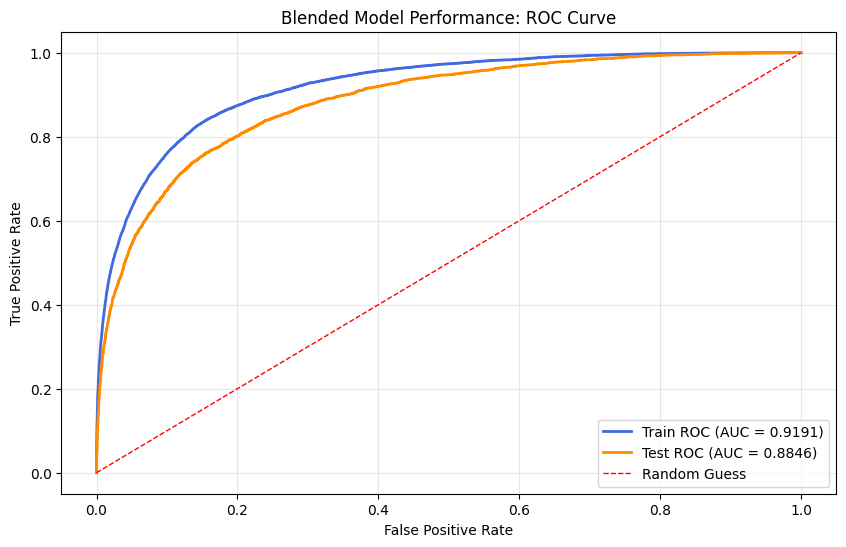

In [58]:
# Import the necessary functions from scikit-learn
from sklearn.metrics import roc_curve, auc
# 1. Calculate FPR(False Positive Rate) and TPR(True Positive Rate) for both sets
# Assuming 'y_probs_train' and 'y_probs_test' are your model.predict_proba() outputs
fpr_train_blend, tpr_train_blend, _ = roc_curve(y_train, y_train_probs_blend)
fpr_test_blend, tpr_test_blend, _ = roc_curve(y_test, y_test_probs_blend)

# 2. Plotting
plt.figure(figsize=(10,6))
plt.plot(fpr_train_blend, tpr_train_blend, color='royalblue', lw=2, label=f'Train ROC (AUC = {auc(fpr_train_blend, tpr_train_blend):.4f})')
plt.plot(fpr_test_blend, tpr_test_blend, color='darkorange', lw=2, label=f'Test ROC (AUC = {auc(fpr_test_blend, tpr_test_blend):.4f})')

# 3. Add formatting
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Blended Model Performance: ROC Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

#### Explaining ROC-AUC
* Full Form: **Receiver Operating Characteristic Area Under the Curve (ROC AUC)**
* The Reciever Operating Characteristic (ROC) curve graphs the **true positive rate** versus the **false positive rate**:
* ROC-AUC and ROC Curve, both are 2 different concept.
* A single line on the graph indicates the curve for a single model, and movement along a line indicates changing the threshold used for classifying a positive instance. The threshold starts at 0 in the upper right to and goes to 1 in the lower left. A curve that is to the left and above another curve indicates a better model.
* Here in the above ROC Curve, the `blue model` is better than the `dark orange model`, which is better than the `red dotted diagonal line` which indicates a naive random guessing model.
* The `Area Under the Curve (AUC)` explains itself by its name, It is simply the **area under the ROC curve**. (This is the integral of the curve.) This metric is between 0 and 1 with a better model scoring higher. A model that simply guesses at random will have an ROC AUC of 0.5.
* When we measure a classifier according to the ROC AUC, we do not generate 0 or 1 predictions, but rather a probability between 0 and 1. This may be confusing because we usually like to think in terms of accuracy, but when we get into problems with `inbalanced classes`, **accuracy is not the best metric**.
* We use more advanced metrics such as `ROC AUC` or the `F1-score` to more accurately reflect the `performance of a classifier`. A model with a `high ROC AUC` will also have a `high accuracy`, but the **ROC-AUC** is a `better representation of model performance`.


## 12. Model Recommendation and Key Findings 

### Recommended ML Model for deployment 

* **Logistic Classifier:** It is a Baseline ML Model for Supervised Learning: Classification problems. As we have seen above, the ROC-AUC Score are very poor for both `Train (ROC-ACU: 0.6297)` and `Test (ROC-ACU: 0.6258)` data, So I am not recommending this to move futhure with this ml model.
* We have tried with other ML model also like: `Random Forest Classifier`,`XGB Classifier`,`LightGBM Classifier`,`Gaussian Naive Bayes`. In these models the `XGB Classifier` and `LightGBM Classifier` peformed better than others, so I have selected both for Hyperparameter tuning.
* I have performed Hyperparameter tuning for both ML Models and find the best Threshold value and F-1 score for both the Models, so after checking those, I have selected `XGB Classifier` recommended for deployment.
* **XGBoost Classifier & LightGBM Blended:** This is **recommended for deployment**, because its ROC-AUC score is better for both training and testing data, and less overfitting.
    * **ROC_AUC_SCORE** 
      * $Train$ ROC-AUC Score: $0.9191$
      * $Test$ ROC-AUC Score: $0.8846$
* The blend reduces the `jitter` or `high-variance noise` that single models often have, making the scores more reliable when you see new customers.
* The blended model produces a smoother probability distribution.

### why we use the blend if the score is lower?
* **Robustness:** Single models that overfit often "crash" when they see real-world data.
* **Precision/Recall Balance:** My blended model maintains that `high 90% accuracy` while keeping the Precision above 50%.  

### Performance Metric Comparison
|Metric          |LightGBM (Old) |XGBoost (Old) |Blended Model (Final)|
|:---------------|:--------------|:-------------|:--------------------|
|Test ROC-AUC    |  0.8384       |  0.8876      |   0.8846            |
|Class 1 F1-Score|  0.39         |  0.54        |   0.54              |
|Overall Accuracy|  91%          |  89%,        |   90%               |
|Overfitting Gap |  3.9 %        |  3.4%        |   3.45%             |

### Bleded Model Deployment

In [60]:
# Creating custom Wrapper class for Combining the both models
import pickle 
import joblib

class CustTransPredEnsemble:
    def __init__(self, xgb, lgbm, w_xgb=0.75):
        self.xgb = xgb
        self.lgbm = lgbm
        self.w_xgb = w_xgb
        self.w_lgbm = 1 - w_xgb

    def predict_proba(self, X):
        # Calculate blended probabilities
        p1 = self.xgb.predict_proba(X)[:, 1]
        p2 = self.lgbm.predict_proba(X)[:, 1]
        final_prob = (self.w_xgb * p1) + (self.w_lgbm * p2)
        
        # Format to match sklearn output (2 columns: [prob_0, prob_1])
        return np.vstack([1 - final_prob, final_prob]).T

    def predict(self, X, threshold=0.5):
        probs = self.predict_proba(X)[:, 1]
        return (probs >= threshold).astype(int)

# Use Alrady Trained models here
final_model = CustTransPredEnsemble(xgb_model, lgbm_model)
joblib.dump(final_model, 'customer_transaction_prediction.pkl')

['customer_transaction_prediction.pkl']

# &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Modeling Completed